In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/industrial-alarm-monitoring-dataset-2018-2024/preprocessed_trendedpointalarm 1.csv


In [2]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv(r"/kaggle/input/industrial-alarm-monitoring-dataset-2018-2024/preprocessed_trendedpointalarm 1.csv")
df

,DateTime,ProcessID,AssetID,AlarmSeverityName,State,TransactionMessage,Stage,AlarmClassName,Year,Month,Day,DayOfWeek,Season,Hour,ProcessedMessage
0,02-01-2018 22:45,IBMS/201801024100783,1-JK1-JK1-01-E.02-AC-ACON-VAVU-0047,3 - Low,A2N,VAV-J09-01-029 SPACE TEMP ALARM,Cancelled,General-ELV,2018,1,2,Tuesday,Winter,22,vavj0901029 space temp alarm
1,03-01-2018 01:41,IBMS/201801024101029,1-JK1-JK1-00-C.27-AC-ACON-VAVU-0019,3 - Low,A2N,VAV-J09-00-027 SPACE TEMP ALARM,Cancelled,General-ELV,2018,1,3,Wednesday,Winter,1,vavj0900027 space temp alarm
2,03-01-2018 03:08,IBMS/201801034101175,1-JK1-JK1-00-C.27-AC-ACON-VAVU-0019,3 - Low,A2N,VAV-J09-00-027 SPACE TEMP ALARM,Cancelled,General-ELV,2018,1,3,Wednesday,Winter,3,vavj0900027 space temp alarm
3,03-01-2018 07:12,IBMS/201801034101667,1-JK1-JK1-00-D.01-AC-ACON-VAVU-0021,3 - Low,A2N,VAV-J09-00-029 SPACE TEMP ALARM,Cancelled,General-ELV,2018,1,3,Wednesday,Winter,7,vavj0900029 space temp alarm
4,03-01-2018 09:04,IBMS/201801034102043,0-JK1-JK1-B2-1.01-AC-ACON-MAHU-0003,2 - Medium,A2N,MAU-JK1-B1-001 Dis Air Temp,Cancelled,General-ELV,2018,1,3,Wednesday,Winter,9,maujk1b1001 dis air temp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102314,26-06-2024 00:12,IBMS/2024062533939735,1-I01-I02-03-IA0.02-AC-ACON-ZOCD-0002,1 - High,N2A,Low Temperature Fault,New,General-ELV-High,2024,6,26,Wednesday,Summer,0,low temperature fault
102315,26-06-2024 00:12,IBMS/2024062533939736,1-I01-I02-00-IA1.04-AC-ACON-ZOCD-0005,1 - High,A2A,High Temperature Fault,New,General-ELV-High,2024,6,26,Wednesday,Summer,0,high temperature fault
102316,26-06-2024 00:13,IBMS/2024062533939741,1-I01-I02-00-IA1.02-AC-ACON-ZOCD-0002,2 - Medium,A2A,Temperature above Set Point,New,General-ELV-High,2024,6,26,Wednesday,Summer,0,temperature set point
102317,26-06-2024 00:13,IBMS/2024062533939743,1-I01-I02-01-IA1.02-AC-ACON-ZOCD-0003,2 - Medium,A2A,Temperature above Set Point,New,General-ELV-High,2024,6,26,Wednesday,Summer,0,temperature set point


In [4]:
# Remove rows with null values
df = df.dropna()

In [5]:
df_time = df.copy()
df_time

,DateTime,ProcessID,AssetID,AlarmSeverityName,State,TransactionMessage,Stage,AlarmClassName,Year,Month,Day,DayOfWeek,Season,Hour,ProcessedMessage
0,02-01-2018 22:45,IBMS/201801024100783,1-JK1-JK1-01-E.02-AC-ACON-VAVU-0047,3 - Low,A2N,VAV-J09-01-029 SPACE TEMP ALARM,Cancelled,General-ELV,2018,1,2,Tuesday,Winter,22,vavj0901029 space temp alarm
1,03-01-2018 01:41,IBMS/201801024101029,1-JK1-JK1-00-C.27-AC-ACON-VAVU-0019,3 - Low,A2N,VAV-J09-00-027 SPACE TEMP ALARM,Cancelled,General-ELV,2018,1,3,Wednesday,Winter,1,vavj0900027 space temp alarm
2,03-01-2018 03:08,IBMS/201801034101175,1-JK1-JK1-00-C.27-AC-ACON-VAVU-0019,3 - Low,A2N,VAV-J09-00-027 SPACE TEMP ALARM,Cancelled,General-ELV,2018,1,3,Wednesday,Winter,3,vavj0900027 space temp alarm
3,03-01-2018 07:12,IBMS/201801034101667,1-JK1-JK1-00-D.01-AC-ACON-VAVU-0021,3 - Low,A2N,VAV-J09-00-029 SPACE TEMP ALARM,Cancelled,General-ELV,2018,1,3,Wednesday,Winter,7,vavj0900029 space temp alarm
4,03-01-2018 09:04,IBMS/201801034102043,0-JK1-JK1-B2-1.01-AC-ACON-MAHU-0003,2 - Medium,A2N,MAU-JK1-B1-001 Dis Air Temp,Cancelled,General-ELV,2018,1,3,Wednesday,Winter,9,maujk1b1001 dis air temp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102314,26-06-2024 00:12,IBMS/2024062533939735,1-I01-I02-03-IA0.02-AC-ACON-ZOCD-0002,1 - High,N2A,Low Temperature Fault,New,General-ELV-High,2024,6,26,Wednesday,Summer,0,low temperature fault
102315,26-06-2024 00:12,IBMS/2024062533939736,1-I01-I02-00-IA1.04-AC-ACON-ZOCD-0005,1 - High,A2A,High Temperature Fault,New,General-ELV-High,2024,6,26,Wednesday,Summer,0,high temperature fault
102316,26-06-2024 00:13,IBMS/2024062533939741,1-I01-I02-00-IA1.02-AC-ACON-ZOCD-0002,2 - Medium,A2A,Temperature above Set Point,New,General-ELV-High,2024,6,26,Wednesday,Summer,0,temperature set point
102317,26-06-2024 00:13,IBMS/2024062533939743,1-I01-I02-01-IA1.02-AC-ACON-ZOCD-0003,2 - Medium,A2A,Temperature above Set Point,New,General-ELV-High,2024,6,26,Wednesday,Summer,0,temperature set point


In [6]:
import pandas as pd

# Assuming 'df' is your DataFrame
df_time['DateTime'] = pd.to_datetime(df_time['DateTime'], format='%d-%m-%Y %H:%M')

# Verify the change
print(df_time.dtypes)


DateTime              datetime64[ns]
ProcessID                     object
AssetID                       object
AlarmSeverityName             object
State                         object
TransactionMessage            object
Stage                         object
AlarmClassName                object
Year                           int64
Month                          int64
Day                            int64
DayOfWeek                     object
Season                        object
Hour                           int64
ProcessedMessage              object
dtype: object


In [7]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd

# Step 1: Preprocessing
# Make a copy of the dataset
df_preprocessed = df_time.copy()

# Encode categorical columns
categorical_columns = ['ProcessID', 'AssetID', 'AlarmSeverityName', 'State', 
                       'TransactionMessage', 'Stage', 'AlarmClassName', 
                       'DayOfWeek', 'Season', 'ProcessedMessage']

label_encoders = {}
for col in categorical_columns:
    encoder = LabelEncoder()
    df_preprocessed[col] = encoder.fit_transform(df_preprocessed[col].astype(str))
    label_encoders[col] = encoder

# Select features for Isolation Forest
features = ['Year', 'Month', 'Day', 'Hour'] + categorical_columns

# Normalize numerical columns
scaler = MinMaxScaler()
df_preprocessed[features] = scaler.fit_transform(df_preprocessed[features])

# Step 2: Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df_preprocessed['anomaly'] = iso_forest.fit_predict(df_preprocessed[features])

# Step 3: Remove Outliers
df_cleaned = df_preprocessed[df_preprocessed['anomaly'] == 1].drop(columns=['anomaly'])

# Restore original categorical values
for col in categorical_columns:
    df_cleaned[col] = label_encoders[col].inverse_transform(df_cleaned[col].astype(int))

# Print data size
print(f"Original dataset size: {df_time.shape}")
print(f"Cleaned dataset size: {df_cleaned.shape}")


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Original dataset size: (98850, 15)
Cleaned dataset size: (93907, 15)


In [8]:
# Ensure DateTime column is in datetime format
df_cleaned['DateTime'] = pd.to_datetime(df_cleaned['DateTime'])

# Set DateTime as the index
df_cleaned.set_index('DateTime', inplace=True)

# Aggregate by hourly counts (you can change this to 'D' for daily aggregation)
time_series_data = df_cleaned.resample('D').size()  # Count alarms per day
time_series_data = time_series_data.rename("AlarmCount")

print(time_series_data.head())


DateTime
2018-01-02     1
2018-01-03     6
2018-01-04    27
2018-01-05     0
2018-01-06     0
Freq: D, Name: AlarmCount, dtype: int64


In [9]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(time_series_data)

print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
if adf_result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")


ADF Statistic: -4.806322605794534
p-value: 5.2891380319830186e-05
The time series is stationary.


In [11]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.


# Steps:

Stationarity: Check and make the data stationary (e.g., via differencing)<br>
Parameter Selection: Choose values for (p, d, q)<br>
p: Order of the AutoRegressive part (lags)<br>
d: Number of times differencing is applied<br>
q: Order of the Moving Average part.


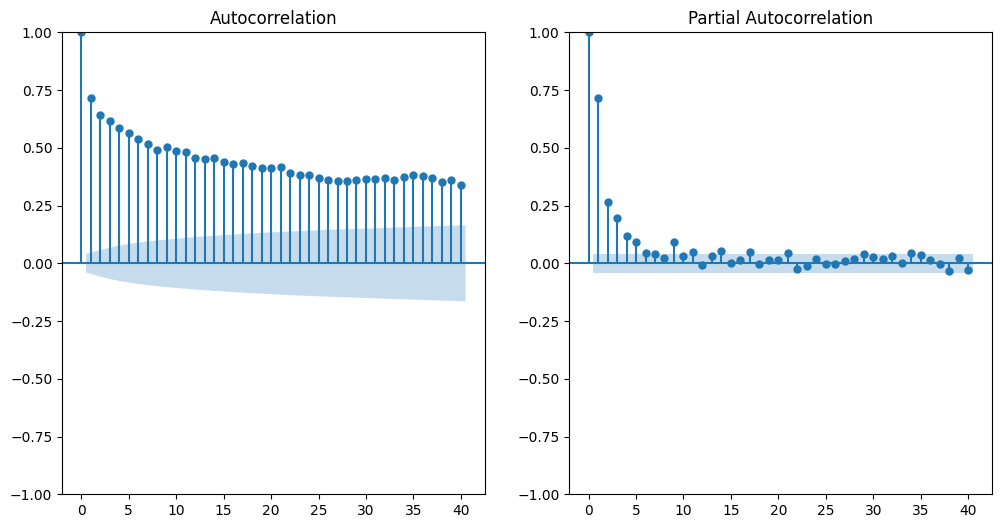

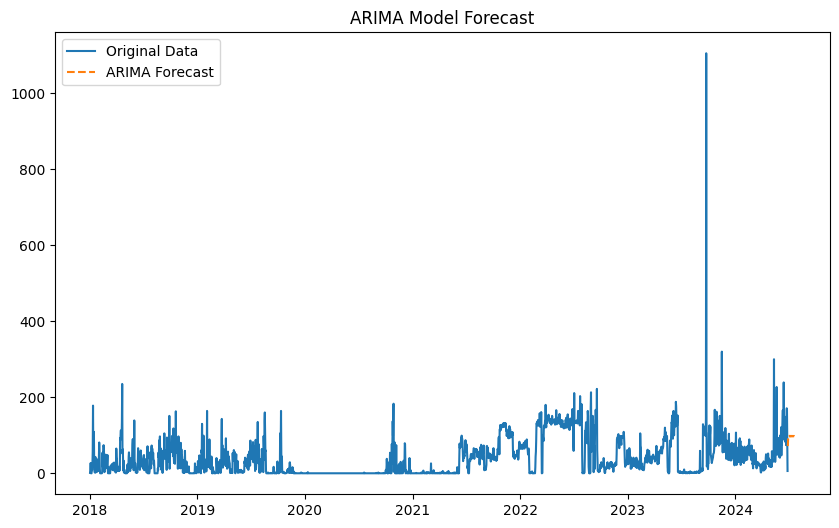

ARIMA MSE: 2473.2719152172317
ARIMA RMSE: 49.7320009170879
ARIMA MAE: 38.17195812456577


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Step 1: Plot ACF and PACF to identify p, d, q
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(time_series_data, lags=40, ax=plt.gca())  # ACF plot
plt.subplot(122)
plot_pacf(time_series_data, lags=40, ax=plt.gca())  # PACF plot
plt.show()

# Step 2: Differencing to make the series stationary (if needed)
# Try different values for d, here we assume d=1 (first-order differencing)
time_series_diff = time_series_data.diff().dropna()

# Step 3: Fit ARIMA Model with hyperparameters p, d, q
# You can adjust p, d, q based on ACF/PACF plots or use GridSearch
p, d, q = 2, 1, 2  # Example parameters, adjust based on your ACF/PACF results

arima_model = ARIMA(time_series_data, order=(p, d, q))
arima_fitted = arima_model.fit()

# Step 4: Forecast the next 24 periods
forecast_arima = arima_fitted.forecast(steps=24)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label="Original Data")
plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='D')[1:], forecast_arima, label="ARIMA Forecast", linestyle="--")
plt.legend()
plt.title("ARIMA Model Forecast")
plt.show()

# Step 5: Performance Metrics
# Assuming you have a test set or the last 24 data points to compare
arima_mse = mean_squared_error(time_series_data[-24:], forecast_arima)
arima_rmse = sqrt(arima_mse)
arima_mae = mean_absolute_error(time_series_data[-24:], forecast_arima)

print(f"ARIMA MSE: {arima_mse}")
print(f"ARIMA RMSE: {arima_rmse}")
print(f"ARIMA MAE: {arima_mae}")


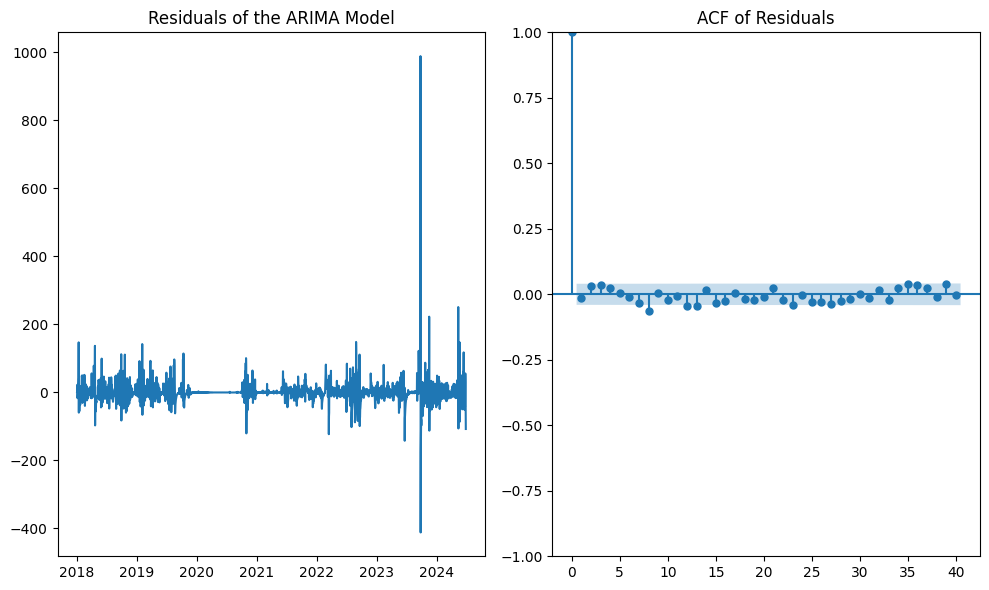

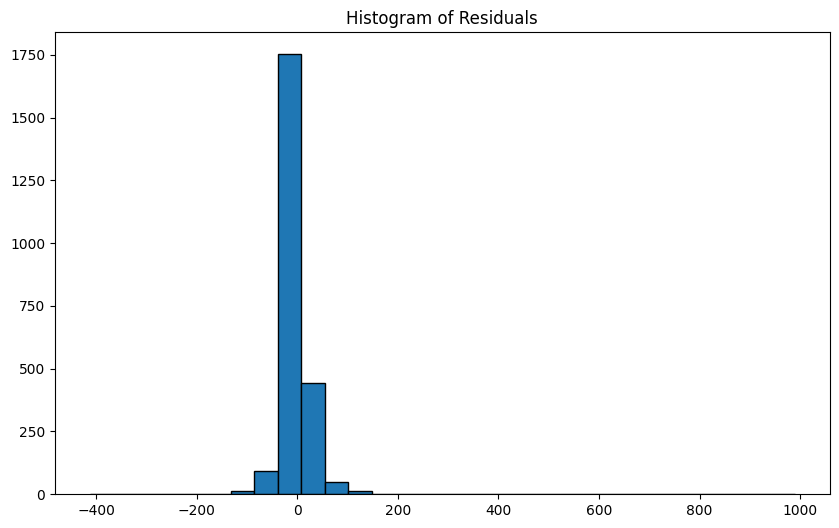

In [13]:
# Step 6: Residual Plots
# Calculate the residuals
residuals = arima_fitted.resid

# Plot residuals
plt.figure(figsize=(10, 6))

# Plot the residuals
plt.subplot(121)
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')

# Plot the ACF of the residuals
plt.subplot(122)
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')

plt.tight_layout()
plt.show()

# Step 7: Residual Diagnostics
# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.show()

# 2. Seasonal ARIMA (SARIMA)
Extension of ARIMA: SARIMA incorporates seasonality into the ARIMA framework.<br>

Adds parameters (P, D, Q, m) to account for seasonal effects:<br>

P: Seasonal AutoRegressive order.<br>
D: Seasonal differencing.<br>
Q: Seasonal Moving Average order.<br>
m: Number of time steps in a seasonal period (e.g., m=12 for monthly data).<br>
Best for: Time series data with both trend and seasonality (e.g., monthly sales data with yearly patterns).<br>

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.05411D+00    |proj g|=  7.80687D-02

At iterate    5    f=  4.99471D+00    |proj g|=  2.09792D-02

At iterate   10    f=  4.91340D+00    |proj g|=  2.85177D-02

At iterate   15    f=  4.90123D+00    |proj g|=  5.21188D-04

At iterate   20    f=  4.90120D+00    |proj g|=  2.16186D-03

At iterate   25    f=  4.90093D+00    |proj g|=  1.05075D-02

At iterate   30    f=  4.90039D+00    |proj g|=  2.03014D-03

At iterate   35    f=  4.90036D+00    |proj g|=  3.51990D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

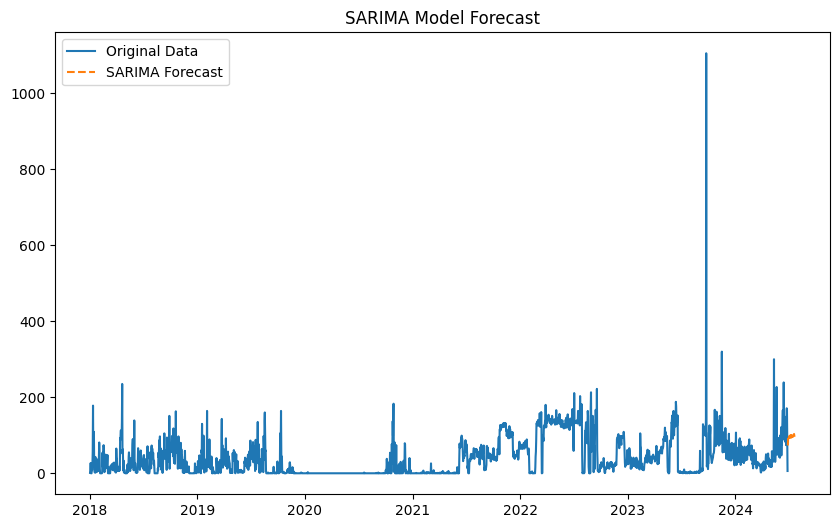

SARIMA MSE: 2384.3386796554673
SARIMA RMSE: 48.82969055457414
SARIMA MAE: 37.585966075072655


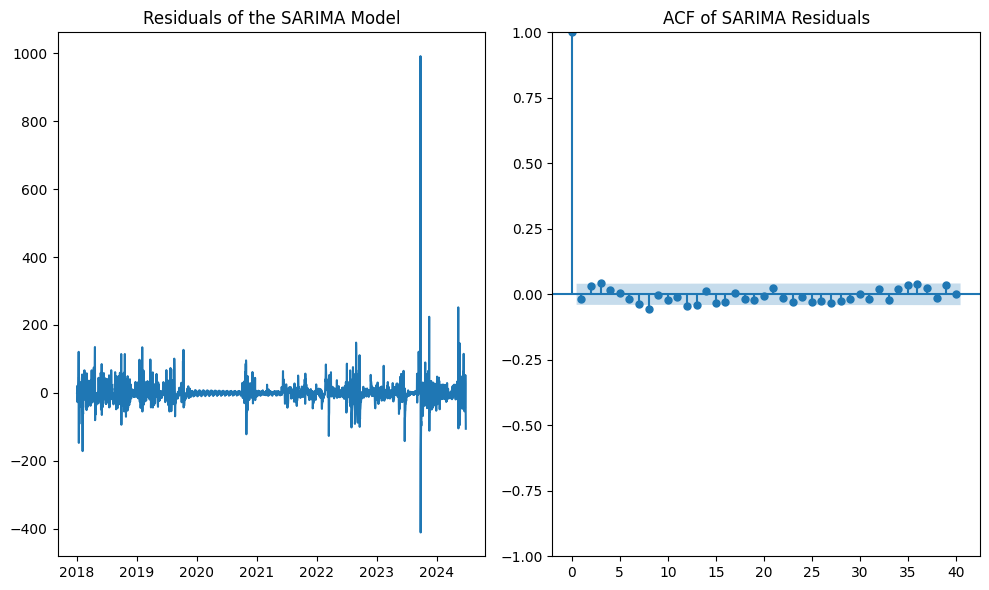

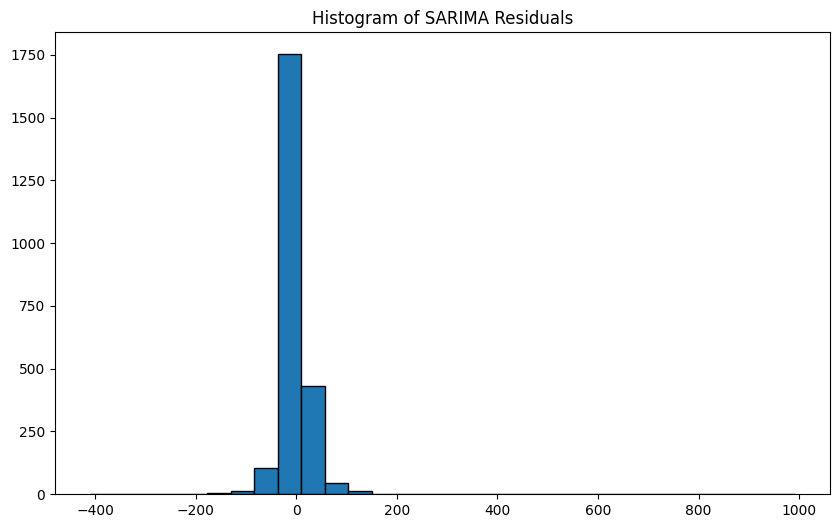

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define and fit the SARIMA model
sarima_model = SARIMAX(time_series_data, order=(2, 1, 2), seasonal_order=(1, 1, 1, 24))
sarima_fitted = sarima_model.fit()

# Forecast the next 24 periods
forecast_sarima = sarima_fitted.forecast(steps=24)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label="Original Data")
plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='D')[1:], forecast_sarima, label="SARIMA Forecast", linestyle="--")
plt.legend()
plt.title("SARIMA Model Forecast")
plt.show()

# Performance Metrics
sarima_mse = mean_squared_error(time_series_data[-24:], forecast_sarima)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mae = mean_absolute_error(time_series_data[-24:], forecast_sarima)

print(f"SARIMA MSE: {sarima_mse}")
print(f"SARIMA RMSE: {sarima_rmse}")
print(f"SARIMA MAE: {sarima_mae}")

# Residuals Plot
residuals_sarima = sarima_fitted.resid

# Plot residuals
plt.figure(figsize=(10, 6))

# Plot the residuals
plt.subplot(121)
plt.plot(residuals_sarima)
plt.title('Residuals of the SARIMA Model')

# Plot the ACF of the residuals
plt.subplot(122)
plot_acf(residuals_sarima, lags=40, ax=plt.gca())
plt.title('ACF of SARIMA Residuals')

plt.tight_layout()
plt.show()

# Step 7: Residual Diagnostics
# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_sarima, bins=30, edgecolor='black')
plt.title('Histogram of SARIMA Residuals')
plt.show()
 


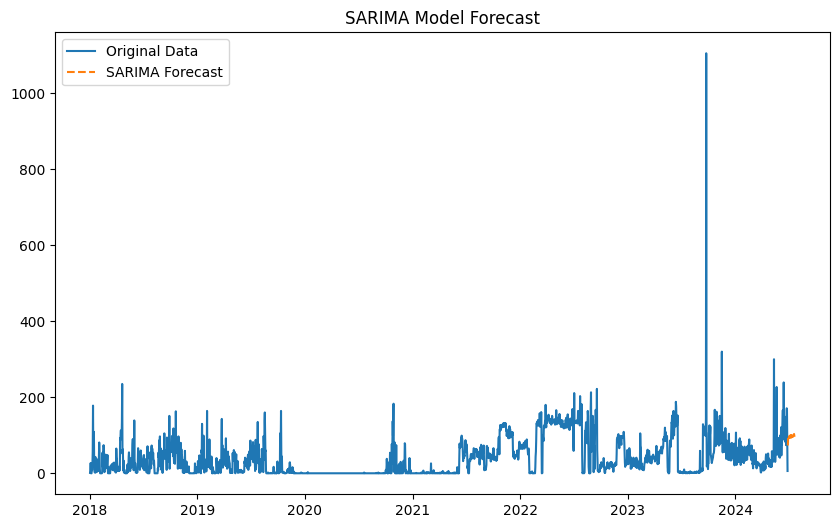

SARIMA MSE: 2384.3386796554673
SARIMA RMSE: 48.82969055457414
SARIMA MAE: 37.585966075072655


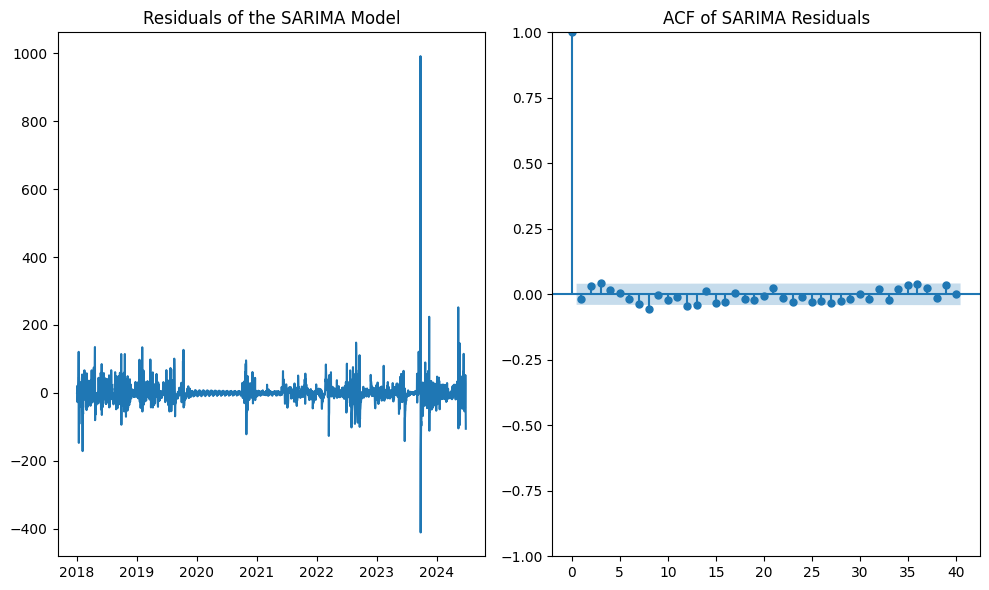

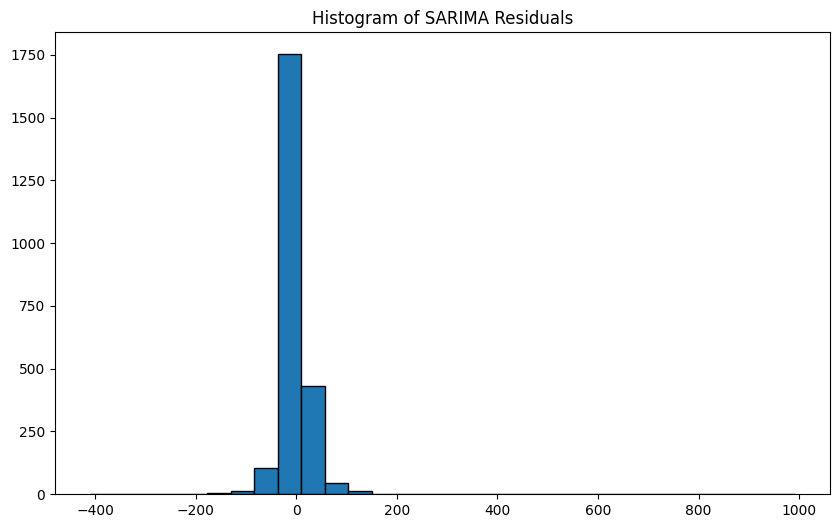

Best SARIMA order: None, seasonal order: None


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf

# Define SARIMA model with initial parameters
sarima_model = SARIMAX(time_series_data, 
                       order=(2, 1, 2),  # Adjust p, d, q based on previous exploration
                       seasonal_order=(1, 1, 1, 24))  # Seasonal order adjustment

# Fit SARIMA model
sarima_fitted = sarima_model.fit(disp=False)

# Forecast SARIMA model
forecast_sarima = sarima_fitted.forecast(steps=24)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label="Original Data")
plt.plot(forecast_sarima, label="SARIMA Forecast", linestyle="--")
plt.legend()
plt.title("SARIMA Model Forecast")
plt.show()

# Performance Metrics
sarima_mse = mean_squared_error(time_series_data[-24:], forecast_sarima)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mae = mean_absolute_error(time_series_data[-24:], forecast_sarima)

print(f"SARIMA MSE: {sarima_mse}")
print(f"SARIMA RMSE: {sarima_rmse}")
print(f"SARIMA MAE: {sarima_mae}")

# Step 1: Check residuals
residuals_sarima = sarima_fitted.resid

# Plot residuals
plt.figure(figsize=(10, 6))

# Plot the residuals
plt.subplot(121)
plt.plot(residuals_sarima)
plt.title('Residuals of the SARIMA Model')

# Plot the ACF of the residuals
plt.subplot(122)
plot_acf(residuals_sarima, lags=40, ax=plt.gca())
plt.title('ACF of SARIMA Residuals')

plt.tight_layout()
plt.show()

# Step 2: Residual Diagnostics
# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_sarima, bins=30, edgecolor='black')
plt.title('Histogram of SARIMA Residuals')
plt.show()

# Additional step: Grid search for hyperparameter tuning (optional)
# This is an example of how you can start tuning parameters
from itertools import product

# Range of parameters to try
p = d = q = range(0, 3)
pdq = list(product(p, d, q))

# Seasonal parameters
P = D = Q = range(0, 2)
seasonal_pdq = list(product(P, D, Q))

# Grid search for best parameters (for better performance)
best_aic = float('inf')
best_order = None
best_seasonal_order = None

for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            temp_model = SARIMAX(time_series_data, 
                                 order=order, 
                                 seasonal_order=seasonal_order,
                                 enforce_stationarity=False, enforce_invertibility=False)
            temp_fitted = temp_model.fit(disp=False)
            
            # If AIC is lower, update best parameters
            if temp_fitted.aic < best_aic:
                best_aic = temp_fitted.aic
                best_order = order
                best_seasonal_order = seasonal_order
        except:
            continue

print(f"Best SARIMA order: {best_order}, seasonal order: {best_seasonal_order}")


In [17]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.8 MB/s eta 0:00:0000:010:01


# AutoSARIMA (Automated SARIMA)
AutoSARIMA refers to an automated process that identifies the best parameters for a SARIMA (Seasonal AutoRegressive Integrated Moving Average) model using a time series dataset. The goal is to automatically select the best values for the SARIMA hyperparameters (p, d, q, P, D, Q, m) without the need for manual trial and error.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=23345.585, Time=25.59 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=24019.269, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=23678.989, Time=1.79 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=23407.745, Time=5.16 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=24017.269, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[24] intercept   : AIC=23343.588, Time=21.72 sec
 ARIMA(2,1,2)(0,0,0)[24] intercept   : AIC=23341.598, Time=1.69 sec
 ARIMA(2,1,2)(1,0,0)[24] intercept   : AIC=23343.588, Time=23.40 sec
 ARIMA(1,1,2)(0,0,0)[24] intercept   : AIC=23323.714, Time=1.10 sec
 ARIMA(1,1,2)(1,0,0)[24] intercept   : AIC=23325.674, Time=8.37 sec
 ARIMA(1,1,2)(0,0,1)[24] intercept   : AIC=23325.675, Time=9.19 sec
 ARIMA(1,1,2)(1,0,1)[24] intercept   : AIC=23327.674, Time=15.00 sec
 ARIMA(0,1,2)(0,0,0)[24] intercept   : AIC=23353.460, Time=0.77 sec
 ARIMA(1,1,1)(0,0,0)[24] intercept   : AIC=23342.373, Time=0.65 sec
 

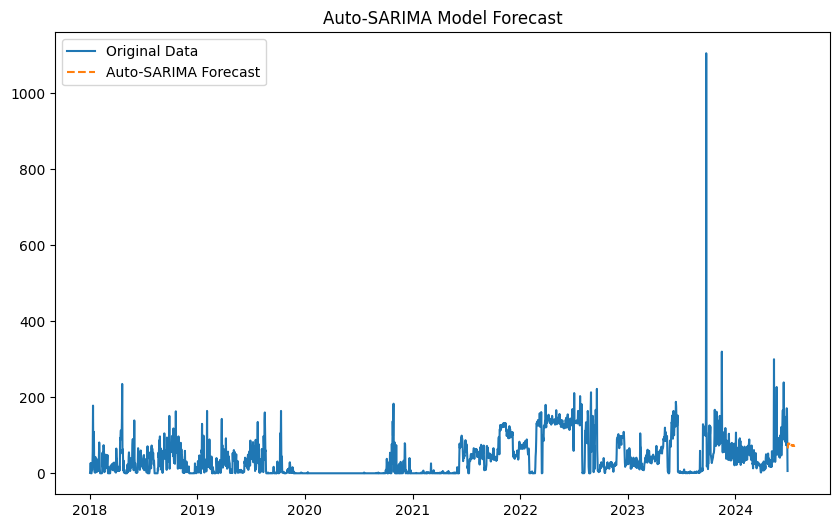

In [18]:
import pmdarima as pm

# Fit SARIMA model automatically
model_auto = pm.auto_arima(time_series_data, seasonal=True, m=24, 
                            trace=True, suppress_warnings=True, stepwise=True)

print(model_auto.summary())

# Forecast using the best found model
forecast_auto = model_auto.predict(n_periods=24)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label="Original Data")
plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='D')[1:], forecast_auto, label="Auto-SARIMA Forecast", linestyle="--")
plt.legend()
plt.title("Auto-SARIMA Model Forecast")
plt.show()


In [19]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.


In [20]:
 !pip install prophet

In [21]:
!pip uninstall fbprophet


In [22]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.


In [23]:
from prophet import Prophet


In [24]:
!pip show prophet


Name: prophet
Version: 1.1.5
Summary: Automatic Forecasting Procedure
Home-page: 
Author: 
Author-email: "Sean J. Taylor" <sjtz@pm.me>, Ben Letham <bletham@fb.com>
License: MIT
Location: /opt/conda/lib/python3.10/site-packages
Requires: cmdstanpy, holidays, importlib-resources, matplotlib, numpy, pandas, tqdm
Required-by: 


In [25]:
pip install fbprophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 53.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 38.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [48 lines of output]
      /tmp/pip-install-kwsvvsmp/fbprophet_6319dead7c914d4db617f9060e04c8c3/setup.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html

In [26]:
'''import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet  # Correct import for the latest version

# Ensure the index is in datetime format
df_cleaned.index = pd.to_datetime(df_cleaned.index)

# Aggregate by daily counts
time_series_data = df_cleaned.resample('D').size()  # Count alarms per day
time_series_data = time_series_data.rename("AlarmCount")

# Prepare data for Prophet
df_prophet = time_series_data.reset_index()  # Reset index to have DateTime as a column
df_prophet.columns = ['ds', 'y']  # Rename columns to 'ds' and 'y' (required by Prophet)

# Initialize the Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df_prophet)

# Make a future dataframe for forecasting (e.g., for the next 30 days)
future = model.make_future_dataframe(df_prophet, periods=30)

# Make the forecast
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)'''


'import pandas as pd\nimport matplotlib.pyplot as plt\nfrom prophet import Prophet  # Correct import for the latest version\n\n# Ensure the index is in datetime format\ndf_cleaned.index = pd.to_datetime(df_cleaned.index)\n\n# Aggregate by daily counts\ntime_series_data = df_cleaned.resample(\'D\').size()  # Count alarms per day\ntime_series_data = time_series_data.rename("AlarmCount")\n\n# Prepare data for Prophet\ndf_prophet = time_series_data.reset_index()  # Reset index to have DateTime as a column\ndf_prophet.columns = [\'ds\', \'y\']  # Rename columns to \'ds\' and \'y\' (required by Prophet)\n\n# Initialize the Prophet model\nmodel = Prophet()\n\n# Fit the model to the data\nmodel.fit(df_prophet)\n\n# Make a future dataframe for forecasting (e.g., for the next 30 days)\nfuture = model.make_future_dataframe(df_prophet, periods=30)\n\n# Make the forecast\nforecast = model.predict(future)\n\n# Plot the forecast\nmodel.plot(forecast)'

Auto Regression Model Coefficients:
const            2.807197
AlarmCount.L1    0.633545
AlarmCount.L2    0.055615
AlarmCount.L3    0.162546
AlarmCount.L4   -0.011312
AlarmCount.L5    0.086831
AlarmCount.L6    0.021560
AlarmCount.L7   -0.027553
dtype: float64
Mean Squared Error (MSE): 4989.831493164157
Root Mean Squared Error (RMSE): 70.63873932315155


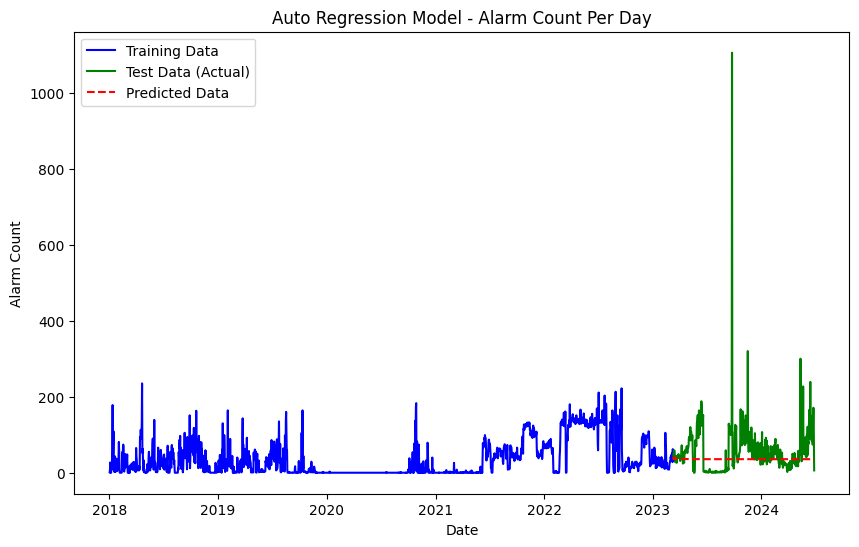

In [27]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Split the data into training and testing sets
train_size = int(len(time_series_data) * 0.8)  # 80% for training
train, test = time_series_data[:train_size], time_series_data[train_size:]

# Step 2: Fit the Auto Regression model
# Setting lags to 7 (one week for daily data, can be adjusted based on seasonality)
lags = 7
model = AutoReg(train, lags=lags, old_names=False)
model_fit = model.fit()

# Step 3: Print model coefficients
print("Auto Regression Model Coefficients:")
print(model_fit.params)

# Step 4: Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Step 5: Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Step 6: Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label="Training Data", color="blue")
plt.plot(test.index, test, label="Test Data (Actual)", color="green")
plt.plot(test.index, predictions, label="Predicted Data", color="red", linestyle="--")
plt.title("Auto Regression Model - Alarm Count Per Day")
plt.xlabel("Date")
plt.ylabel("Alarm Count")
plt.legend()
plt.show()


04:38:54 - cmdstanpy - INFO - Chain [1] start processing
04:38:54 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


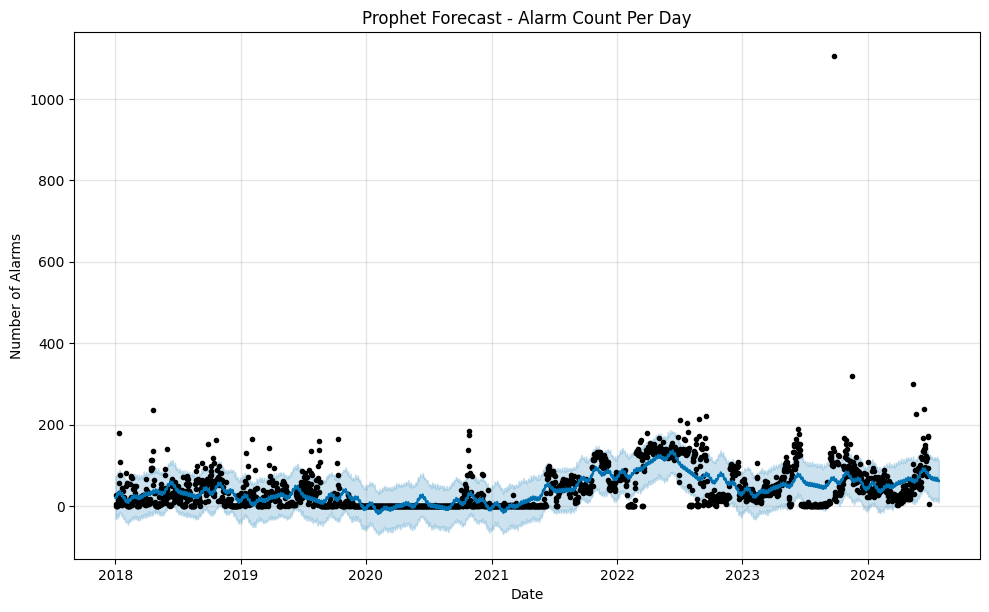

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

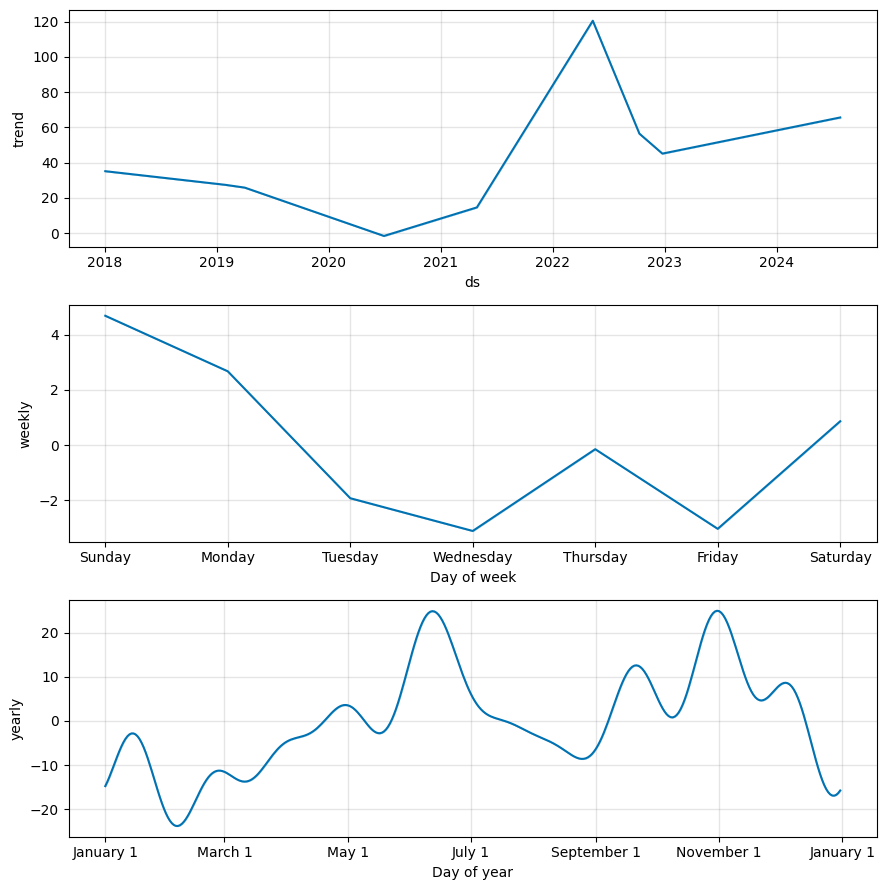

,ds,yhat,yhat_lower,yhat_upper
2368,2024-06-27,74.660372,22.986059,124.878271
2369,2024-06-28,70.622012,21.627814,125.074167
2370,2024-06-29,73.450794,23.694148,126.458623
2371,2024-06-30,76.282368,26.195555,126.952351
2372,2024-07-01,73.354458,18.664791,120.877505
2373,2024-07-02,67.923682,22.173800,121.967276
2374,2024-07-03,66.003018,15.495953,118.543762
2375,2024-07-04,68.329746,14.894193,115.928218
2376,2024-07-05,64.883651,15.489596,116.341767
2377,2024-07-06,68.316447,17.673891,121.298154


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Prepare the data for Prophet
# Prophet expects two columns: 'ds' (datetime) and 'y' (values)
df_prophet = time_series_data.reset_index()
df_prophet.columns = ['ds', 'y']  # Rename for Prophet compatibility

# Initialize the Prophet model
prophet_model = Prophet()

# Fit the model
prophet_model.fit(df_prophet)

# Create a future dataframe for predictions (next 30 days)
future = prophet_model.make_future_dataframe(periods=30, freq='D')

# Forecast the future
forecast = prophet_model.predict(future)

# Visualize the forecast
fig = prophet_model.plot(forecast)
plt.title("Prophet Forecast - Alarm Count Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Alarms")
plt.show()

# Optional: Visualize the forecast components (trend, seasonality)
fig_components = prophet_model.plot_components(forecast)
plt.show()

# Print forecasted values for the next 30 days
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)


04:40:48 - cmdstanpy - INFO - Chain [1] start processing
04:40:48 - cmdstanpy - INFO - Chain [1] done processing


Performance Metrics:
Mean Absolute Error (MAE): 31.22
Mean Squared Error (MSE): 1737.25
Root Mean Squared Error (RMSE): 41.68


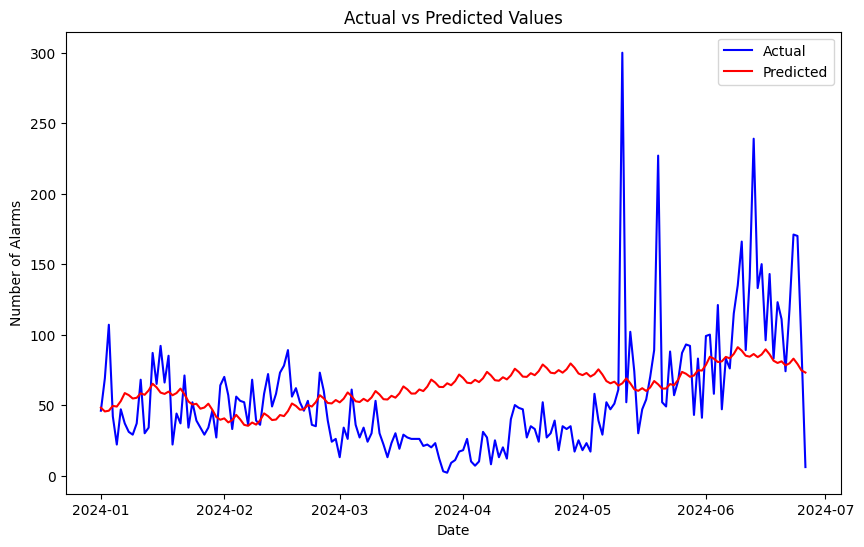

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define the cutoff point for training and testing
cutoff_date = '2023-12-31'  # Adjust as needed based on your dataset
train_data = df_prophet[df_prophet['ds'] <= cutoff_date]
test_data = df_prophet[df_prophet['ds'] > cutoff_date]

# Fit the Prophet model on the training set
prophet_model_train = Prophet()
prophet_model_train.fit(train_data)

# Create a dataframe for testing period
future_test = test_data[['ds']]

# Predict on the test set
forecast_test = prophet_model_train.predict(future_test)

# Calculate performance metrics
y_true = test_data['y'].values
y_pred = forecast_test['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print("Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Optional: Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['ds'], y_true, label='Actual', color='blue')
plt.plot(test_data['ds'], y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Number of Alarms')
plt.legend()
plt.show()


Performance Metrics:
Mean Absolute Error (MAE): 24.52
Mean Squared Error (MSE): 1566.30
Root Mean Squared Error (RMSE): 39.58


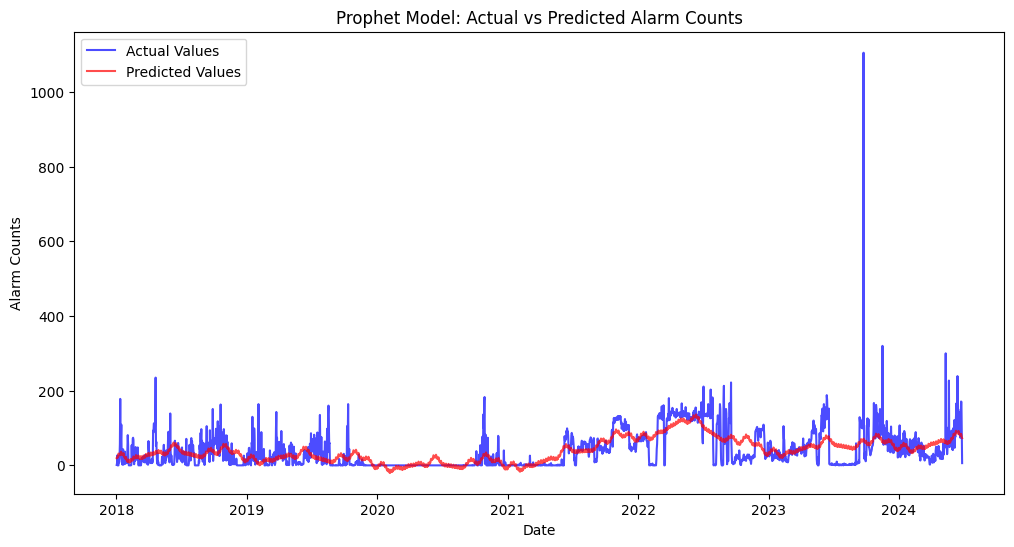

In [30]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Extract the actual and predicted values from the forecast
# Drop the last 30 days of predictions for evaluation, keeping only historical data
df_evaluation = forecast.merge(df_prophet, on='ds', how='inner', suffixes=('_forecast', '_actual'))
actual = df_evaluation['y']
predicted = df_evaluation['yhat']

# Calculate performance metrics
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

# Print performance metrics
print("Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs. predicted values for comparison
plt.figure(figsize=(12, 6))
plt.plot(df_evaluation['ds'], actual, label='Actual Values', color='blue', alpha=0.7)
plt.plot(df_evaluation['ds'], predicted, label='Predicted Values', color='red', alpha=0.7)
plt.title("Prophet Model: Actual vs Predicted Alarm Counts")
plt.xlabel("Date")
plt.ylabel("Alarm Counts")
plt.legend()
plt.show()
